In [1]:

#reading the data
import pandas as pd

df = pd.read_csv("garments_worker_productivity.csv")

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

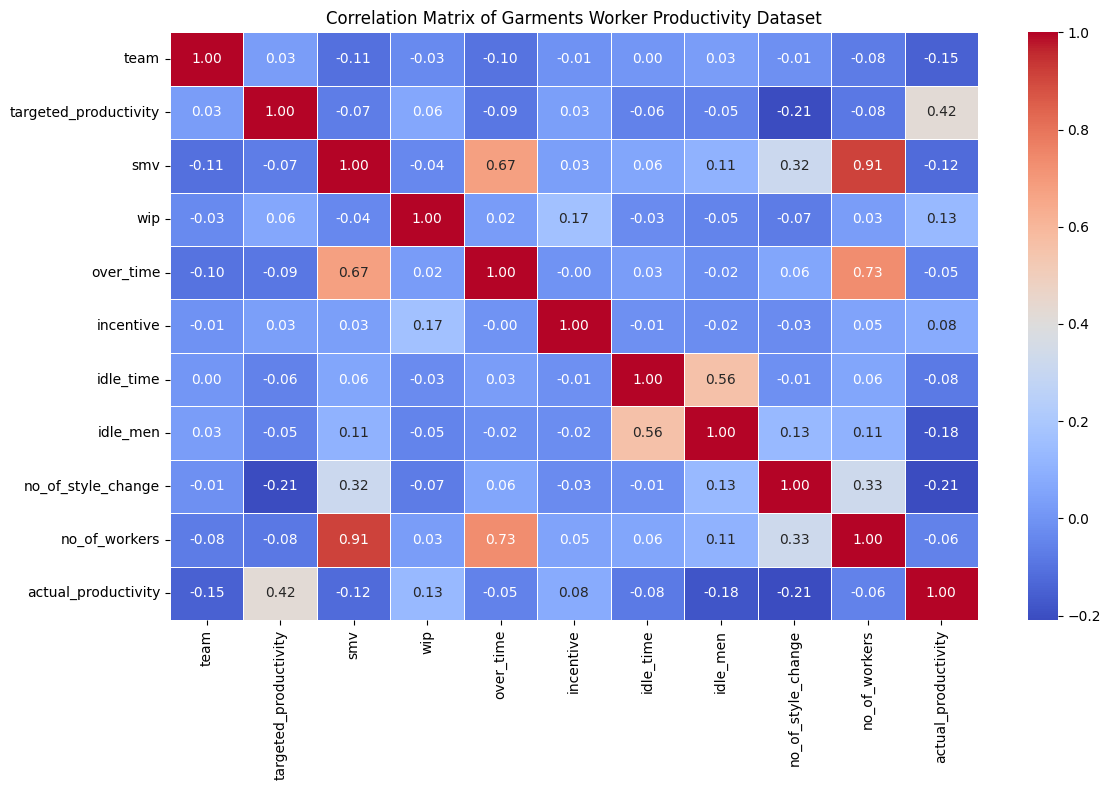

In [2]:
#correlation analysis

import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("garments_worker_productivity.csv")

# Compute correlation matrix (only for numeric columns)
correlation_matrix = df.corr(numeric_only=True)

# Display the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Garments Worker Productivity Dataset")
plt.tight_layout()
plt.show()

In [3]:
# Descriptive analysis for numeric columns
print("=== Numeric Columns Summary ===")
print(df.describe())

# Descriptive analysis for categorical columns
print("\n=== Categorical Columns Summary ===")
print(df.describe(include=['object']))

=== Numeric Columns Summary ===
              team  targeted_productivity          smv           wip  \
count  1197.000000            1197.000000  1197.000000    691.000000   
mean      6.426901               0.729632    15.062172   1190.465991   
std       3.463963               0.097891    10.943219   1837.455001   
min       1.000000               0.070000     2.900000      7.000000   
25%       3.000000               0.700000     3.940000    774.500000   
50%       6.000000               0.750000    15.260000   1039.000000   
75%       9.000000               0.800000    24.260000   1252.500000   
max      12.000000               0.800000    54.560000  23122.000000   

          over_time    incentive    idle_time     idle_men  \
count   1197.000000  1197.000000  1197.000000  1197.000000   
mean    4567.460317    38.210526     0.730159     0.369256   
std     3348.823563   160.182643    12.709757     3.268987   
min        0.000000     0.000000     0.000000     0.000000   
25%     1

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("garments_worker_productivity.csv")

# Step 1: Drop missing values
df = df.dropna()

# Step 2: Handle 'date'
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.weekday
df = df.drop(columns=['date'])

# Step 3: Normalize 'department'
df['department'] = df['department'].str.strip().str.lower()
df['department'] = df['department'].replace({
    'sweing': 'sewing',
    'finishing ': 'finishing'
})

# Step 4: Select only necessary input features
features = ['incentive', 'over_time', 'no_of_style_change', 'smv', 'month', 'weekday', 'department']
df = df[features + ['actual_productivity']]

# Step 5: One-hot encode 'department'
df = pd.get_dummies(df, columns=['department'], drop_first=False)

# Step 6: Train/test split
X = df.drop(columns=['actual_productivity'])
y = df['actual_productivity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)



Train shape: (552, 7)
Test shape: (139, 7)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
pred1 = model_lr.predict(X_test)

mae1 = mean_absolute_error(y_test, pred1)
mse1 = mean_squared_error(y_test, pred1)
r2_1 = r2_score(y_test, pred1)

print("Linear Regression Results:")
print("MAE:", mae1)
print("MSE:", mse1)
print("R² Score:", r2_1)


Linear Regression Results:
MAE: 0.06211624411680669
MSE: 0.007069436073631457
R² Score: 0.6600652170854281


In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
pred2 = model_rf.predict(X_test)


print(X_train.shape)

mae2 = mean_absolute_error(y_test, pred2)
mse2 = mean_squared_error(y_test, pred2)
r2_2 = r2_score(y_test, pred2)

print("Random Forest Results:")
print("MAE:", mae2)
print("MSE:", mse2)
print("R² Score:", r2_2)



(552, 7)
Random Forest Results:
MAE: 0.045087854242134275
MSE: 0.006514906393927786
R² Score: 0.6867298511985878


In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 1: Initialize the XGBoost model
model_xgb = XGBRegressor()

# Step 2: Train the model
model_xgb.fit(X_train, y_train)

# Step 3: Make predictions
pred3 = model_xgb.predict(X_test)

# Step 4: Evaluate the model
mae3 = mean_absolute_error(y_test, pred3)
mse3 = mean_squared_error(y_test, pred3)
r2_3 = r2_score(y_test, pred3)

# Step 5: Print evaluation results
print("XGBoost Model Results:")
print("Mean Absolute Error (MAE):", mae3)
print("Mean Squared Error (MSE):", mse3)
print("R² Score:", r2_3)


XGBoost Model Results:
Mean Absolute Error (MAE): 0.04971247038123601
Mean Squared Error (MSE): 0.007835587780883151
R² Score: 0.6232247093601141


In [20]:
# Assuming you have already run and calculated:
# Linear Regression: mae1, mse1, r2_1
# Random Forest:     mae2, mse2, r2_2
# XGBoost:           mae3, mse3, r2_3

# Display comparison results
print("\nModel Comparison (MAE, MSE, R² Score):")
print(f"Linear Regression:\n  MAE = {mae1:.4f}, MSE = {mse1:.4f}, R² = {r2_1:.4f}")
print(f"Random Forest:    \n  MAE = {mae2:.4f}, MSE = {mse2:.4f}, R² = {r2_2:.4f}")
print(f"XGBoost:          \n  MAE = {mae3:.4f}, MSE = {mse3:.4f}, R² = {r2_3:.4f}")

# Determine best model based on R² score
best_model = None
best_model_name = ""

if r2_3 >= r2_1 and r2_3 >= r2_2:
    best_model = model_xgb
    best_model_name = "XGBoost"
elif r2_2 >= r2_1:
    best_model = model_rf
    best_model_name = "Random Forest"
else:
    best_model = model_lr
    best_model_name = "Linear Regression"

print(f"\nFrom the three models, **{best_model_name}** is performing the best.")

# Save the best model
import joblib
joblib.dump(best_model, "../gwp.pkl")
print("Best model saved as 'gwp.pkl'.")



Model Comparison (MAE, MSE, R² Score):
Linear Regression:
  MAE = 0.0621, MSE = 0.0071, R² = 0.6601
Random Forest:    
  MAE = 0.0451, MSE = 0.0065, R² = 0.6867
XGBoost:          
  MAE = 0.0497, MSE = 0.0078, R² = 0.6232

From the three models, **Random Forest** is performing the best.
Best model saved as 'gwp.pkl'.
